In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1     # Length of the domain
N = 1024     # Number of spatial points
c = 0.05      # Wave speed
T = 1.0      # Final time

# Discretization
x = np.linspace(0, L, N)
dx = x[1] - x[0]
dt = 0.0005   # Time step
nt = int(T / dt)  # Number of time steps

# Generate initial conditions using random Fourier coefficients
def generate_initial_condition(x, num_modes=100):
    """Generate a random initial condition using Fourier modes."""
    a0 = np.random.randn()
    initial_condition = a0
    for n in range(20, num_modes+10, 10):
        an = np.random.randn()
        bn = np.random.randn()
        initial_condition += an * np.cos(2 * np.pi * n * x / L) + bn * np.sin(2 * np.pi * n * x / L)
    return initial_condition

# Placeholder for dataset
initial_conditions = []
final_conditions = []

# Time integration function using finite difference
def solve_wave_equation(u0, v0, nt, dt, dx, c):
    u = u0.copy()
    v = v0.copy()
    for t in range(nt):
        u_new = u + dt * v
        v_new = v + dt * c**2 * (np.roll(u, -1) - 2*u + np.roll(u, 1)) / dx**2
        u, v = u_new, v_new
    return u

# Generate the dataset
for _ in range(2048):
    u0 = generate_initial_condition(x)
    v0 = np.zeros_like(x)
    u_final = solve_wave_equation(u0, v0, nt, dt, dx, c)
    
    initial_conditions.append(u0)
    final_conditions.append(u_final)

# Convert to numpy arrays
initial_conditions = np.array(initial_conditions)
final_conditions = np.array(final_conditions)




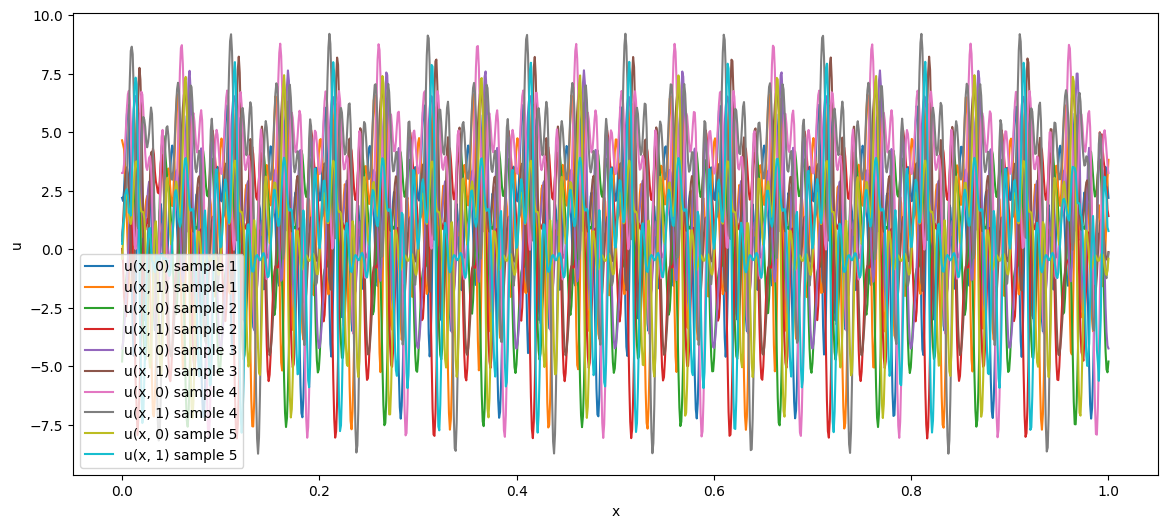

In [7]:
# Verify the dataset by plotting a few samples
plt.figure(figsize=(14,6))
for i in range(5):
    plt.plot(x, initial_conditions[i], label=f'u(x, 0) sample {i+1}')
    plt.plot(x, final_conditions[i], label=f'u(x, 1) sample {i+1}')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

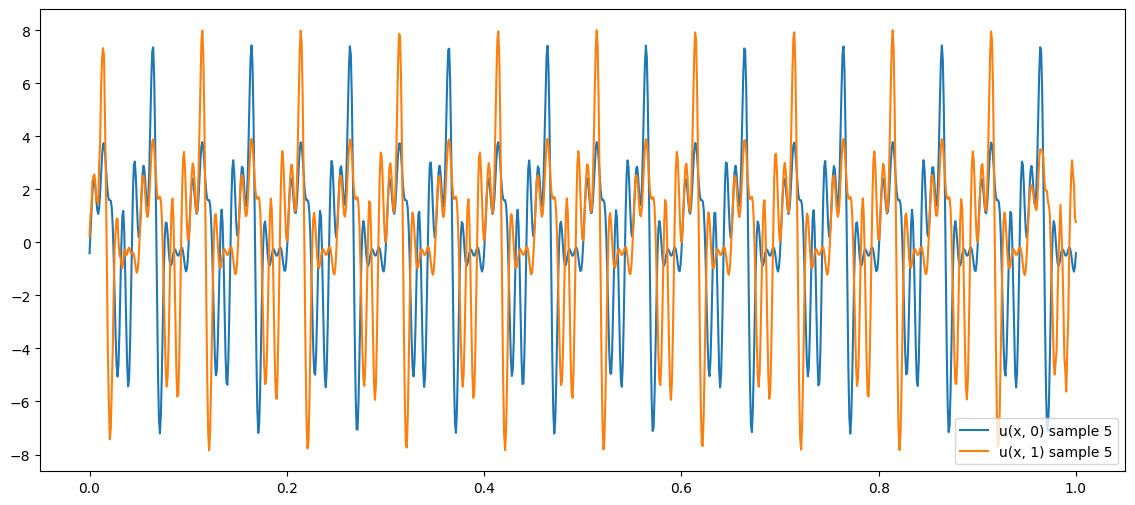

In [5]:
plt.figure(figsize=(14,6))
plt.plot(x,initial_conditions[i], label=f'u(x, 0) sample {i+1}')
plt.plot(x,final_conditions[i], label=f'u(x, 1) sample {i+1}')
plt.legend()

In [6]:
# Save the dataset
np.savez('wave_equation_dataset_2048_1024points.npz', x=x, initial_conditions=initial_conditions, final_conditions=final_conditions)